# Fuelconsumption polynomial Regression

## import needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## read the data

In [2]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## understanding the data

In [3]:
cdf= df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


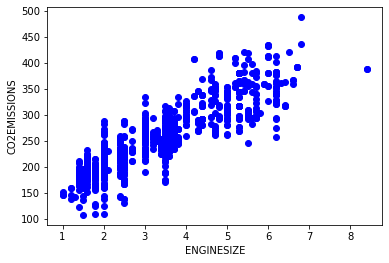

In [4]:
plt.scatter(cdf.ENGINESIZE , cdf.CO2EMISSIONS , color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

## creating train and test sets

In [5]:
msk= np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
print(len(train))
print(len(test))

828
239


## Polynomial regression

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

print(train_x[:3])
poly = PolynomialFeatures(degree=2)          ## [x1^0  x1^1  x1^2, x2^0  x2^1  x2^2, ... ]
train_x_poly = poly.fit_transform(train_x)
train_x_poly

[[2. ]
 [3.5]
 [3.5]]


array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [13]:
model= linear_model.LinearRegression()
train_y_=model.fit(train_x_poly, train_y)

print(model)           #we used linear regression but with created polynomial features in degree 2
print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)

LinearRegression()
Coefficients:  [[ 0.         46.1047469  -0.91824155]]
Intercept:  [114.2404869]


Text(0, 0.5, 'CO2EMISSIONS')

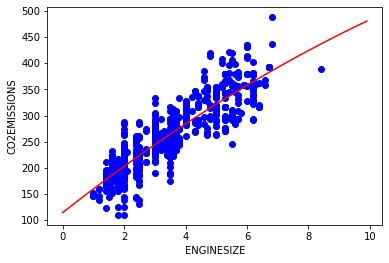

In [16]:
plt.scatter(train.ENGINESIZE , train.CO2EMISSIONS , color='blue')
xx = np.arange(0,10,0.1)
yy = model.intercept_[0] + model.coef_[0][1]*xx + model.coef_[0][2]*np.power(xx,2)
plt.plot(xx, yy, '-r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

## Evaluation

In [17]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = model.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_-test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_-test_y)**2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

Mean absolute error: 23.81
Residual sum of squares (MSE): 1036.82
R2-score: 0.74
